In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_fashion = pd.read_csv(r'C:\Users\Edwin\Downloads\FashionDataset.csv')

In [3]:
data_fashion.set_index('index',inplace=True)

In [4]:
data_fashion.columns

Index(['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount',
       'Category'],
      dtype='object')

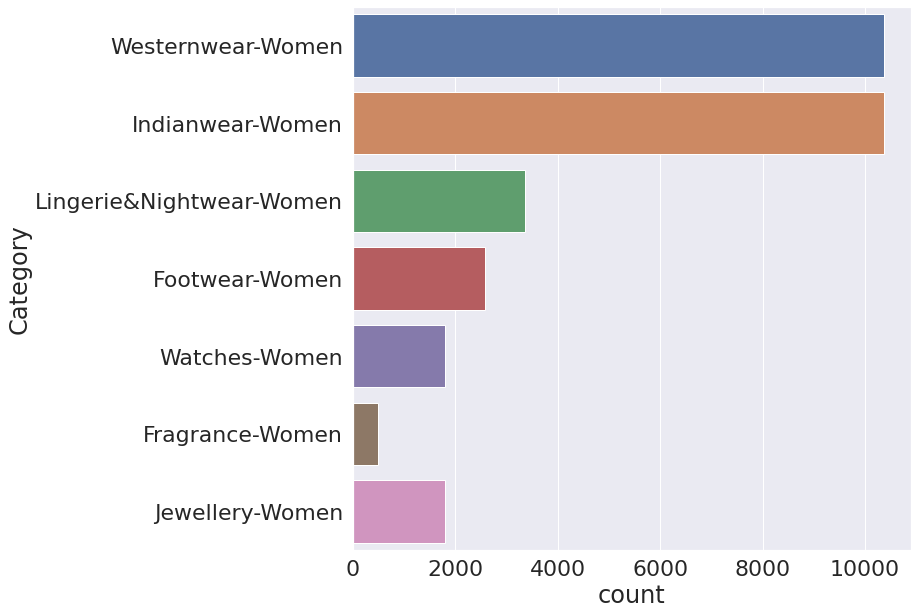

In [5]:
with plt.style.context('Solarize_Light2'):
    sns.set(font_scale = 2)
    plt.figure(figsize=(10,10))
    sns.countplot(y = data_fashion.Category)

In [6]:
data_fashion.SellPrice = data_fashion.SellPrice.astype(float)
top_discount = data_fashion.groupby(['Discount']).agg({'SellPrice':'count'})
result= top_discount.nlargest(10,'SellPrice')
result.reset_index(inplace=True)
result

,Discount,SellPrice
0,50% off,7605
1,Nan,7025
2,30% off,2757
3,60% off,2644
4,40% off,2189
5,20% off,1786
6,55% off,1480
7,65% off,715
8,70% off,602
9,45% off,545


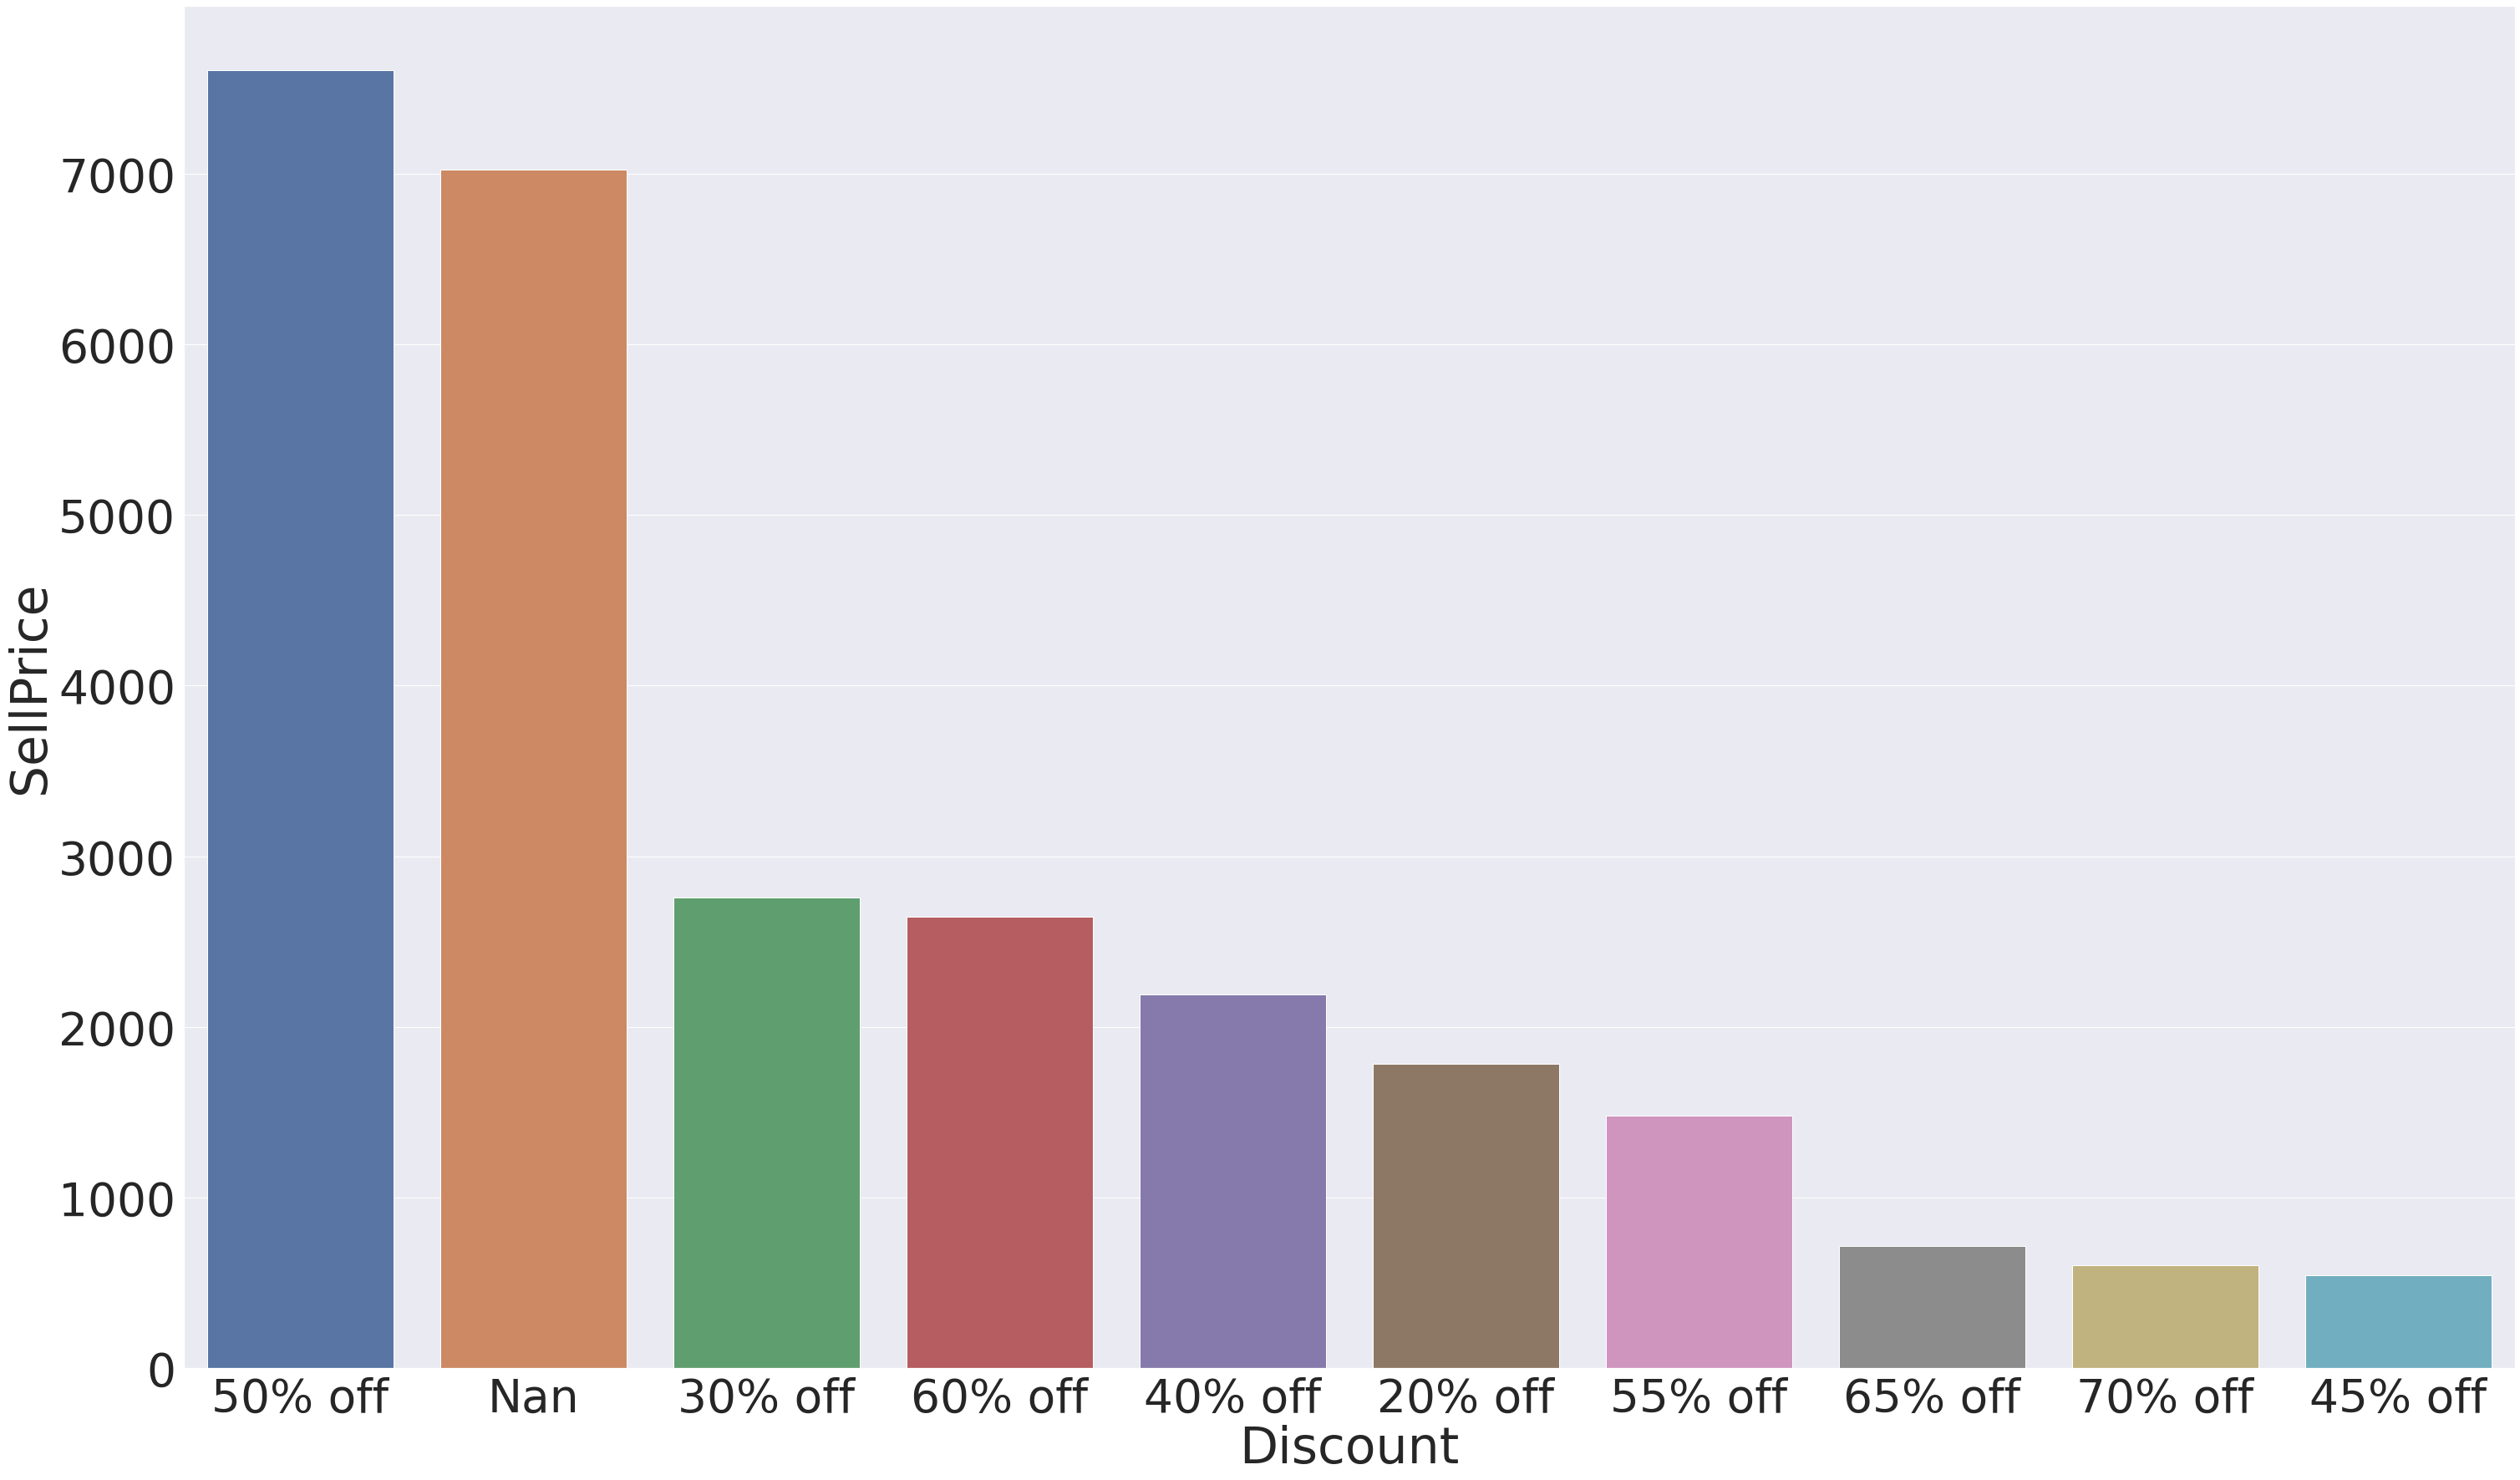

In [7]:
with plt.style.context('Solarize_Light2'):
    sns.set(font_scale = 5)
    plt.figure(figsize=(50,30))
    sns.barplot( x = result.Discount, y=result.SellPrice)

## Sales

The graph above shows how many sales for each discount. This means that the 50% and no discount(nan) are where most of the sales are from. The graph is showing the top 10 discounts that have high sales. The importance of the graph is to help assess which discount will entice customers to buy

In [8]:
cat = data_fashion.groupby('Category').agg({'Deatils':'count','SellPrice': 'mean'})
cat.reset_index(inplace=True)
cat 

,Category,Deatils,SellPrice
0,Footwear-Women,2574,2194.030303
1,Fragrance-Women,494,3972.067368
2,Indianwear-Women,10374,1484.112982
3,Jewellery-Women,1794,2163.707826
4,Lingerie&Nightwear-Women,3354,917.843101
5,Watches-Women,1794,8657.288116
6,Westernwear-Women,10374,1317.855539


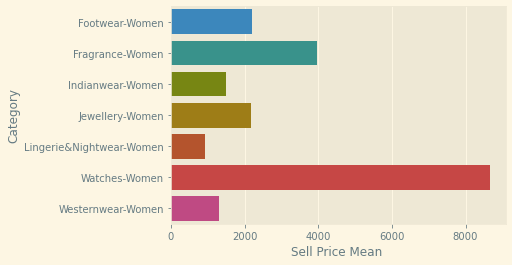

In [9]:
with plt.style.context('Solarize_Light2'):

    sns.barplot(data=cat, y = 'Category', x='SellPrice',orient='h')
    plt.xlabel('Sell Price Mean ')

## Sales Average

Womans watches are a clear winner in that it's average sale price is higher than even the next category. Watches can get very expensive very quickly depending on the brand, as some brands are heavily dependant on manual labor. Many high end brands reframe from mass producing watches with machines, and still have people assembling it. In addition some watches are just limited edition, so with the high demand and low supply, the price will be high.   

In [10]:
woman_watches = data_fashion[data_fashion['Category'] == 'Watches-Women']
subwatch = woman_watches.groupby('BrandName').agg({'SellPrice':('mean','count')})
subwatch.reset_index(inplace=True)
subwatch.head()

BrandName     SellPrice      
                               mean count
0                 Nan           NaN     0
1  alexandre christie  25995.000000     1
2             amazfit   9405.250000    16
3          anne klein   7236.267857    56
4     armani exchange  11401.806452    31

In [11]:
subwatch.sort_values(by=('SellPrice','count'),ascending=False,inplace=True)
top_watch = subwatch.head(10)

In [12]:
top_watch

BrandName     SellPrice      
                               mean count
18           giordano   3955.584158   202
5               casio   5605.848485   198
35              titan   7602.343915   189
16             fossil  10762.931818   132
13           fastrack   2403.307087   127
33              timex   3676.766355   107
25       michael kors  18547.845361    97
3          anne klein   7236.267857    56
8   daniel wellington  11795.363636    55
11     emporio armani  21810.400000    50

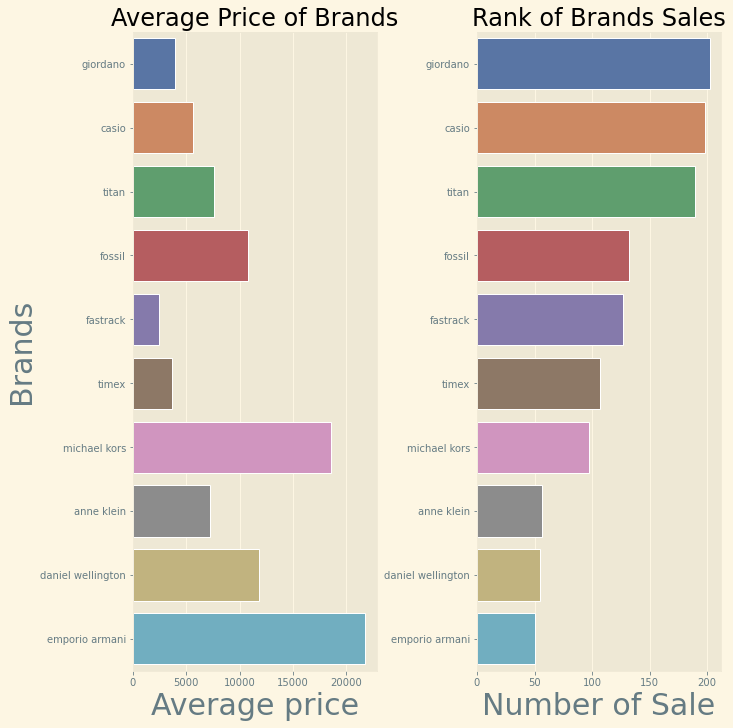

In [13]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1,2,figsize=(10,10),constrained_layout=True)
    sns.set(font_scale = 2)
#     fig.tight_layout()
#     plt.figure(figsize=(50,40))
    sns.barplot(ax = ax[0],data=top_watch, y = ('BrandName',''), x = ('SellPrice',  'mean'))
    ax[0].set_title("Average Price of Brands")
    ax[0].set_xlabel('Average price',fontsize=30)
    ax[0].set_ylabel('Brands', fontsize = 30)
    
    sns.barplot(ax = ax[1], data=top_watch, y=('BrandName',''), x = (('SellPrice',  'count')))
    ax[1].set_title("Rank of Brands Sales")
    ax[1].set_xlabel('Number of Sale',fontsize=30)
    ax[1].set_ylabel('', fontsize = 30)

## Watches Analysis 

With the top 10 selling watches, we can see a better breakdown above. We see that Giordano being a brand that has the most number of sales and it's not expensives. Keep in mind these the currency is Rupees. We can see that the expensive item, Emporio Armani, has the highest average price, but doesnt sell as much as Giordano. The dataframe I extracted is just seeing the comparison of the top selling brands, in the highest average priced Category, Women Watches from earlier above. 


In [46]:
frag = data_fashion[data_fashion.Category == 'Fragrance-Women']

In [48]:
frag = data_fashion[data_fashion.Category == 'Fragrance-Women']
subfrag = frag.groupby('BrandName').agg({'SellPrice':('mean','count')})
subfrag.reset_index(inplace=True)
subfrag.head()

BrandName SellPrice      
                            mean count
0       18.21 man made    5500.0     1
1                 4711    3120.0     1
2                  Nan       NaN     0
3  abercrombie & fitch    4428.0     5
4               aigner    3797.5     2

In [51]:
subfrag.sort_values(by=('SellPrice','count'),ascending=False,inplace=True)
top_frag = subfrag.head(10)

In [52]:
top_frag

BrandName    SellPrice      
                             mean count
5              ajmal   797.806452    31
16  carolina herrera  5661.800000    25
58      paco rabanne  4626.428571    21
9            arcelia   497.476190    21
38         hugo boss  5470.588235    17
15      calvin klein  4609.375000    16
73           versace  5709.375000    16
64             skinn  2119.866667    15
14          burberry  6578.333333    15
23          davidoff  4396.428571    14

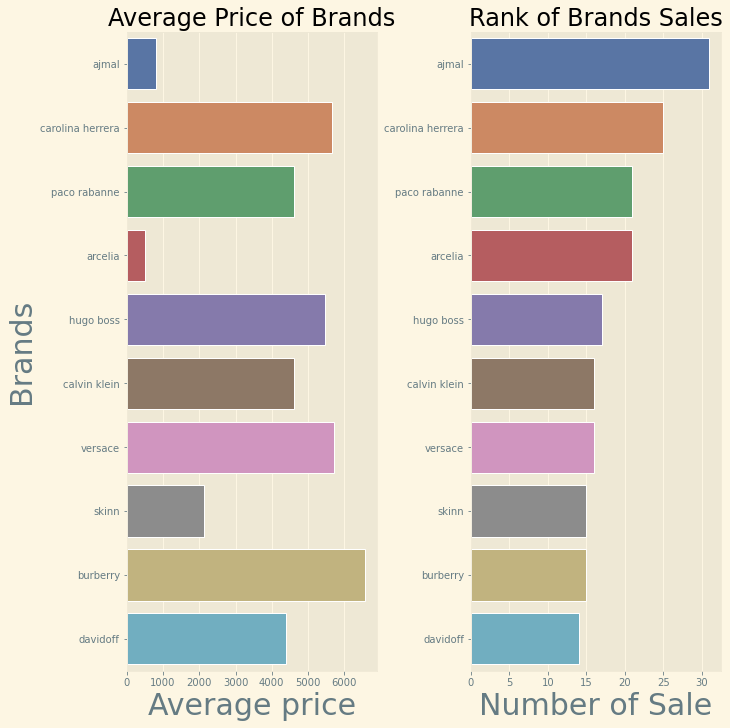

In [53]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1,2,figsize=(10,10),constrained_layout=True)
    sns.set(font_scale = 2)
#     fig.tight_layout()
#     plt.figure(figsize=(50,40))
    sns.barplot(ax = ax[0],data=top_frag, y = ('BrandName',''), x = ('SellPrice',  'mean'))
    ax[0].set_title("Average Price of Brands")
    ax[0].set_xlabel('Average price',fontsize=30)
    ax[0].set_ylabel('Brands', fontsize = 30)
    
    sns.barplot(ax = ax[1], data=top_frag, y=('BrandName',''), x = (('SellPrice',  'count')))
    ax[1].set_title("Rank of Brands Sales")
    ax[1].set_xlabel('Number of Sale',fontsize=30)
    ax[1].set_ylabel('', fontsize = 30)

## Fragrance
While it is doesn't have a high selling volume, it still the second highest averaging category. With proper marketing, and a higher volume sale, it can take the lead very quickly. 

## Miscellaneous

We've seen just what category have the highest sales and a breakdown. We will see the other side of what's the highest earning category, and a breakdown of it. 

In [28]:
group = data_fashion.groupby('Category').agg({"SellPrice":('sum','count')})
group.reset_index(inplace=True)
group

Category   SellPrice      
                                    sum count
0            Footwear-Women   5430225.0  2475
1           Fragrance-Women   1886732.0   475
2          Indianwear-Women  14804027.0  9975
3           Jewellery-Women   3732396.0  1725
4  Lingerie&Nightwear-Women   2960044.0  3225
5             Watches-Women  14933822.0  1725
6         Westernwear-Women  13145609.0  9975

In [56]:
group.columns

MultiIndex([( 'Category',      ''),
            ('SellPrice',   'sum'),
            ('SellPrice', 'count')],
           )

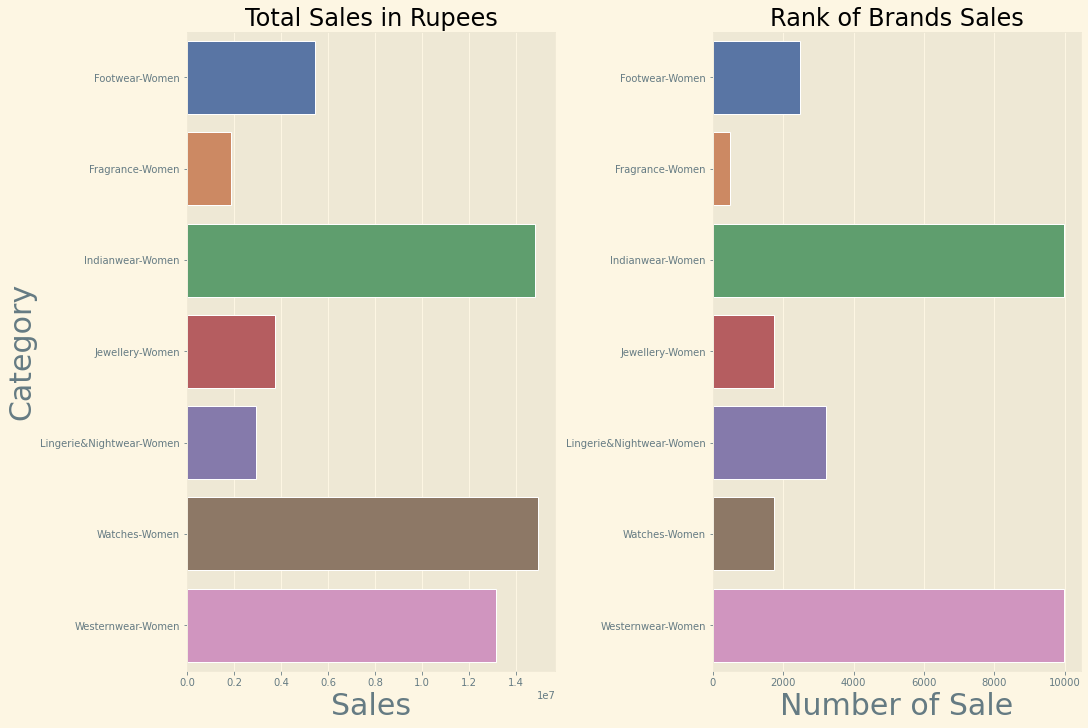

In [69]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1,2,figsize=(15,10),constrained_layout=True)
    sns.set(font_scale = 2)
#     fig.tight_layout()
#     plt.figure(figsize=(50,40))
    sns.barplot(ax = ax[0],data=group, y = ('Category',''), x = ('SellPrice',  'sum'))
    ax[0].set_title("Total Sales in Rupees")
    ax[0].set_xlabel('Sales',fontsize=30)
    ax[0].set_ylabel('Category', fontsize = 30)
    
    sns.barplot(ax = ax[1], data=group, y=('Category',''), x = (('SellPrice',  'count')))
    ax[1].set_title("Rank of Brands Sales")
    ax[1].set_xlabel('Number of Sale',fontsize=30)
    ax[1].set_ylabel('', fontsize = 30)
    

## Total Sales

This is interesting graph, as the previous group was about highest average price per sale, and here is total sales, and it's a little different. Previous group was Fragrance and Watches, but in this graph we see that the dominating categories are Watches(still), Indian Wear, and Western  Wear. The two new categories does not have a high averaging price. This might be the reason for their high volume, as it's convenient for people, and they can buy more, ultimately being a category that have high sales.
We've see the watches break down so we will look into the new categories. 

In [38]:
wearwomen = data_fashion[data_fashion.Category == 'Indianwear-Women']
subwear = wearwomen.groupby('BrandName').agg({'SellPrice':('mean','count')})
subwear.reset_index(inplace=True)
subwear.head()

BrandName    SellPrice      
                     mean count
0        Nan          NaN     0
1      aarke  3107.906977    43
2     amukti   809.107527    93
3        and  1985.153846    13
4  arteastri  3051.768116   138

In [39]:
subwear.sort_values(by=('SellPrice','count'),ascending=False,inplace=True)
top_wear = subwear.head(10)

In [40]:
top_wear

BrandName    SellPrice      
                        mean count
46   vastranand  2182.490603  1543
26      janasya  1022.837209   731
19  global desi  1669.704420   724
41         stop   551.881301   615
44      varanga  1638.855196   587
49            w  2043.019608   561
27      juniper  1351.962963   540
52        ziyaa  1043.942418   521
5       aurelia  1460.944444   486
21        indya  1631.466377   461

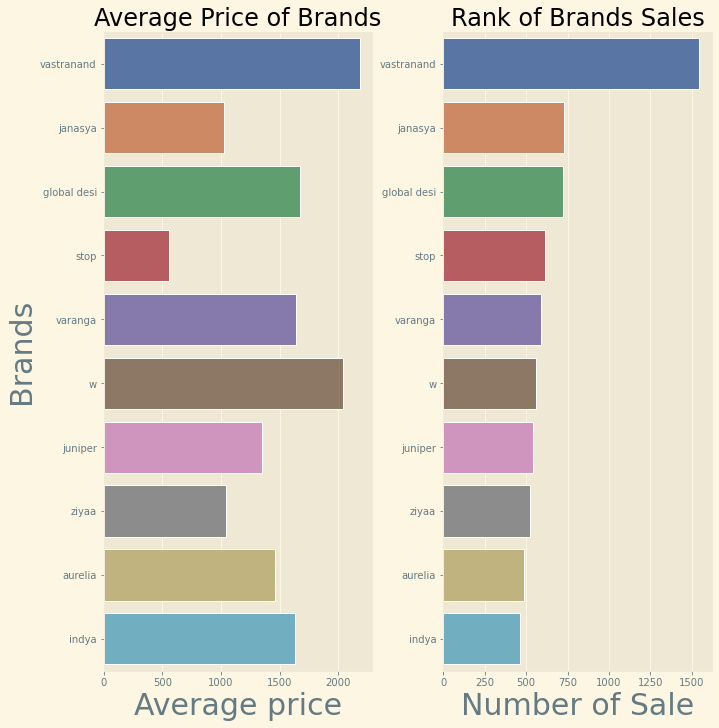

In [66]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1,2,figsize=(10,10),constrained_layout=True)
    sns.set(font_scale = 2) 
#     plt.figure(figsize=(50,40))
    sns.barplot(ax = ax[0],data=top_wear, y = ('BrandName',''), x = ('SellPrice',  'mean'))
    ax[0].set_title("Average Price of Brands")
    ax[0].set_xlabel('Average price',fontsize=30)
    ax[0].set_ylabel('Brands', fontsize = 30)
    
    sns.barplot(ax = ax[1], data=top_wear, y=('BrandName',''), x = (('SellPrice',  'count')))
    ax[1].set_title("Rank of Brands Sales")
    ax[1].set_xlabel('Number of Sale',fontsize=30)
    ax[1].set_ylabel('', fontsize = 30)

## Indian wear 
With this break down we see what brand are responsible for the high volume of sales. With the top ten brands not being expensive, this helps the consumer to keep coming back and buying more. As well as making good gifts for loved ones.


In [72]:
western = data_fashion[data_fashion.Category == 'Westernwear-Women']
subwest = western.groupby('BrandName').agg({'SellPrice':('mean','count')})
subwest.reset_index(inplace=True)
subwest.head()

BrandName    SellPrice      
                    mean count
0      109f  1025.578947   114
1       Nan          NaN     0
2     aarke  2900.000000     1
3    adidas  1549.857143   140
4     alcis  1134.714286    14

In [73]:
subwest.sort_values(by=('SellPrice','count'),ascending=False,inplace=True)
top_west = subwest.head(10)

In [74]:
top_west

BrandName    SellPrice      
                            mean count
100     zink london  1048.878855   908
8               and  1720.531205   689
63             life   538.570248   605
28         faballey  1255.546512   602
94        vero moda  2000.550388   516
59   latin quarters  1321.735941   409
74             only  1715.803069   391
58            kraus  1109.556136   383
33          fratini   863.745763   295
18   crimsoune club  1049.570934   289

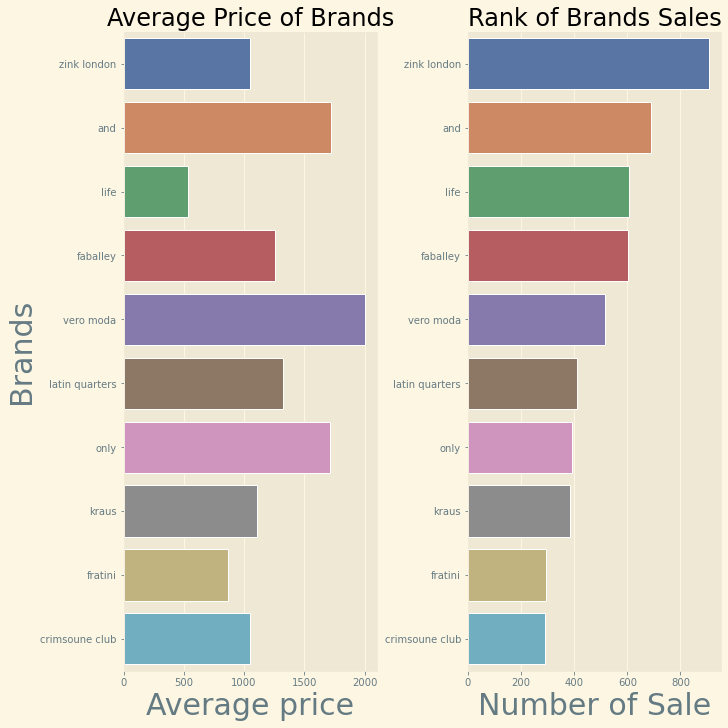

In [75]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1,2,figsize=(10,10),constrained_layout=True)
    sns.set(font_scale = 2) 
#     plt.figure(figsize=(50,40))
    sns.barplot(ax = ax[0],data=top_west, y = ('BrandName',''), x = ('SellPrice',  'mean'))
    ax[0].set_title("Average Price of Brands")
    ax[0].set_xlabel('Average price',fontsize=30)
    ax[0].set_ylabel('Brands', fontsize = 30)
    
    sns.barplot(ax = ax[1], data=top_west, y=('BrandName',''), x = (('SellPrice',  'count')))
    ax[1].set_title("Rank of Brands Sales")
    ax[1].set_xlabel('Number of Sale',fontsize=30)
    ax[1].set_ylabel('', fontsize = 30)

## Western Wear 

A Similar breakdown that we as before. The fact that a high volume selling category isn't expensive, mean it will have sales. The only brand that has high sales with very low volume of sales, is watches, but that due to the fact that their average sale is the than all the others.   

In [82]:
lowest_earning = data_fashion.groupby(['Category']).agg({'SellPrice':('mean','sum')})
lowest_earning.reset_index(inplace=True)
lowest_earning

Category    SellPrice            
                                    mean         sum
0            Footwear-Women  2194.030303   5430225.0
1           Fragrance-Women  3972.067368   1886732.0
2          Indianwear-Women  1484.112982  14804027.0
3           Jewellery-Women  2163.707826   3732396.0
4  Lingerie&Nightwear-Women   917.843101   2960044.0
5             Watches-Women  8657.288116  14933822.0
6         Westernwear-Women  1317.855539  13145609.0

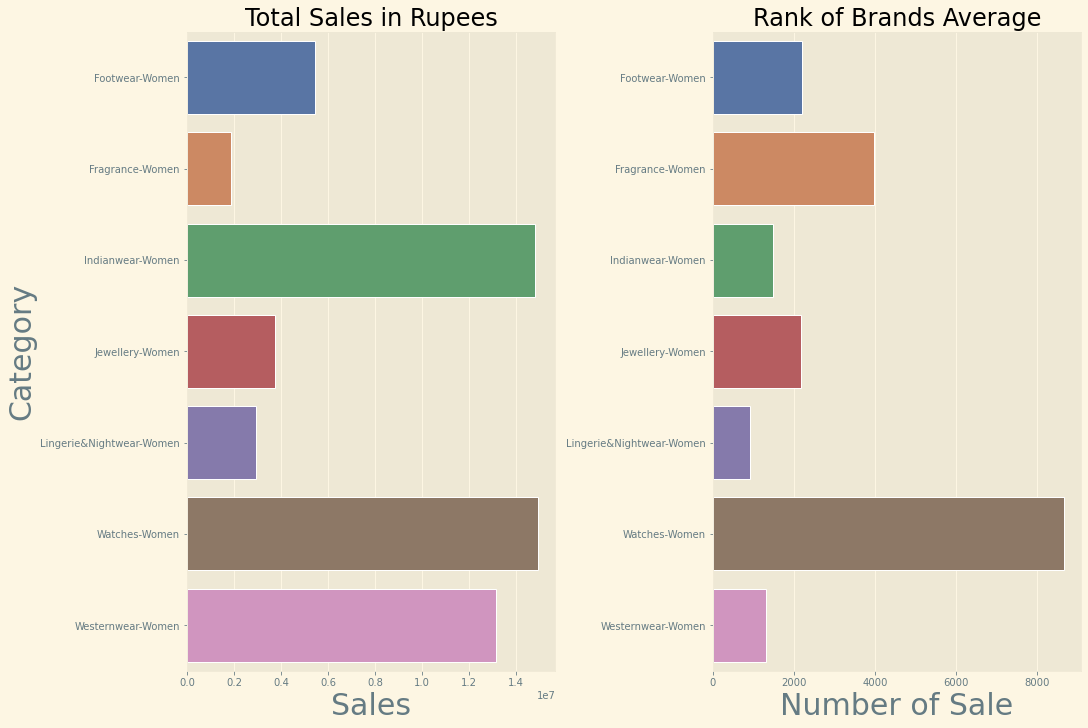

In [83]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1,2,figsize=(15,10),constrained_layout=True)
    sns.set(font_scale = 2)
#     fig.tight_layout()
#     plt.figure(figsize=(50,40))
    sns.barplot(ax = ax[0],data=lowest_earning, y = ('Category',''), x = ('SellPrice',  'sum'))
    ax[0].set_title("Total Sales in Rupees")
    ax[0].set_xlabel('Sales',fontsize=30)
    ax[0].set_ylabel('Category', fontsize = 30)
    
    sns.barplot(ax = ax[1], data=lowest_earning, y=('Category',''), x = (('SellPrice',  'mean')))
    ax[1].set_title("Rank of Brands Average Price")
    ax[1].set_xlabel('Number of Sale',fontsize=30)
    ax[1].set_ylabel('', fontsize = 30)

In [89]:
low_sale = data_fashion[data_fashion.Category== 'Lingerie&Nightwear-Women']
sublow = low_sale.groupby('BrandName').agg({'SellPrice':('mean','count')})
sublow.reset_index(inplace=True)
sublow.head()

BrandName    SellPrice      
                       mean count
0          Nan          NaN     0
1        aarke  3600.000000     1
2       adidas  1858.545455    22
3  allen solly   799.000000     4
4       amante   729.108808   193

In [90]:
sublow.sort_values(by=('SellPrice','count'),ascending=False,inplace=True)
top_low = sublow.head(10)

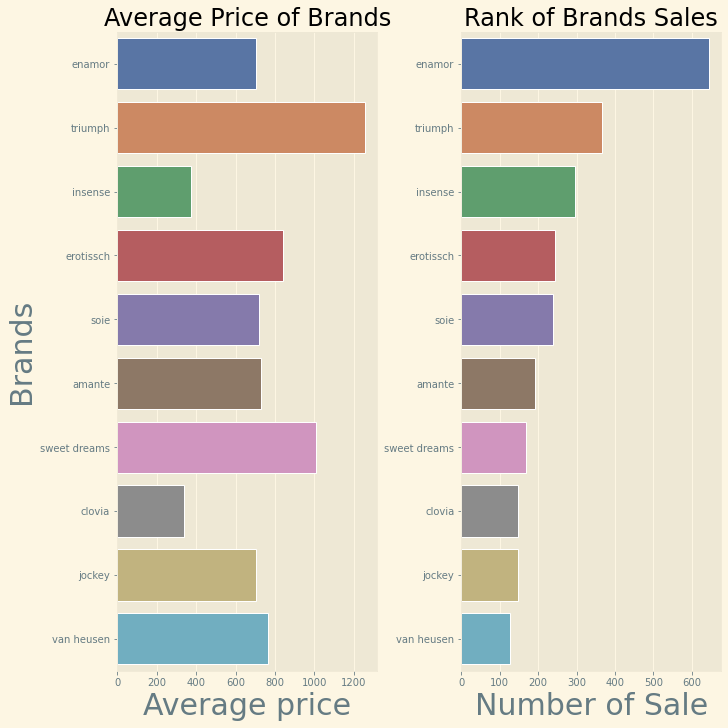

In [92]:
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1,2,figsize=(10,10),constrained_layout=True)
    sns.set(font_scale = 2) 
#     plt.figure(figsize=(50,40))
    sns.barplot(ax = ax[0],data=top_low, y = ('BrandName',''), x = ('SellPrice',  'mean'))
    ax[0].set_title("Average Price of Brands")
    ax[0].set_xlabel('Average price',fontsize=30)
    ax[0].set_ylabel('Brands', fontsize = 30)
    
    sns.barplot(ax = ax[1], data=top_low, y=('BrandName',''), x = (('SellPrice',  'count')))
    ax[1].set_title("Rank of Brands Sales")
    ax[1].set_xlabel('Number of Sale',fontsize=30)
    ax[1].set_ylabel('', fontsize = 30)

## Lowest Selling and Averaging 
The last graph shows how the lowest saling and averaging category is doing. With the category being a lingerie it could be a category that just doesnt do well in India. It could be a new clothing wear that the majority of people don't know about. This a category that would need a lot of marketing to be a dominating category.


## Conclusion 

This Analysis is to show how brands that are not expensive, can have a high sale volume. We clearly see this with clothing brands, Western and Indian wears. The only category that doesnt follow that rule, is watches. Watches have a higher average cost for the consumer, so while it has a low volume of sales, its total sales surpasses the previously two mentioned categories. This is because people know that watches are a near life long item. With a trusted brand, like Casio, Titan, or Fossil, you have a watch that can last you a long time, leading to the low demand to replace it. India could new to the lingerie market and therefore not many people know about it. A place like india, with a high population, a category can sell a lot even if only a small portion of the population. 